In [1]:
## Boiler plate code common to many notebooks.  See the TestFilesCommonCode.ipynb for details
from __future__ import print_function
%run TestFilesCommonCode.ipynb

SimpleITK Version: 0.9.1
Compiled: Sep 28 2015 10:07:41



In [2]:
#dwi_fn='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/mainWF/Outputs/DWI_Baseline.nrrd'
dwi_fn='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/mainWF/Outputs/DWI_corrected_alignedSpace.nrrd'

t1_fn='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/mainWF/HCPWorkflow_CACHE_105115/PreprocessingWorkflow_CACHE_105115/ResampleToAlignedDWIResolution/mapflow/_ResampleToAlignedDWIResolution0/StrippedT1_125.nrrd'
t2_fn='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/mainWF/HCPWorkflow_CACHE_105115/PreprocessingWorkflow_CACHE_105115/ResampleToAlignedDWIResolution/mapflow/_ResampleToAlignedDWIResolution1/StrippedT2_125.nrrd'

label_fn='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/mainWF/HCPWorkflow_CACHE_105115/PreprocessingWorkflow_CACHE_105115/ResampleToAlignedDWIResolution/mapflow/_ResampleToAlignedDWIResolution2/DWIBrainMask.nrrd'

OutputDir='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/2_SRWF/test_tune_parameters/outImageFiles'
MatlabFilesDir='/scratch/TESTS/IpythonNotebook/20160615_HCPWF/2_SRWF/test_tune_parameters/matlabFiles'

In [3]:
import os
import glob
import sys

#\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
#####################################################################################
#     Prepend the shell environment search paths
#PROGRAM_PATHS = '/scratch/NAMICExternalProjects/release_20150715/bin'
PROGRAM_PATHS = '/scratch/BS/release-BSR2/bin'
PROGRAM_PATHS = PROGRAM_PATHS.split(':')
PROGRAM_PATHS.extend(os.environ['PATH'].split(':'))
os.environ['PATH'] = ':'.join(PROGRAM_PATHS)

CUSTOM_ENVIRONMENT=dict()

# Platform specific information
#     Prepend the python search paths
PYTHON_AUX_PATHS = '/scratch/BS/BRAINSTools/AutoWorkup'
PYTHON_AUX_PATHS = PYTHON_AUX_PATHS.split(':')
PYTHON_AUX_PATHS.extend(sys.path)
sys.path = PYTHON_AUX_PATHS

import SimpleITK as sitk
import nipype
from nipype.interfaces.base import CommandLine, CommandLineInputSpec, TraitedSpec, File, Directory
from nipype.interfaces.base import traits, isdefined, BaseInterface
from nipype.interfaces.utility import Merge, Split, Function, Rename, IdentityInterface
import nipype.interfaces.io as nio   # Data i/oS
import nipype.pipeline.engine as pe  # pypeline engine
from nipype.interfaces.freesurfer import ReconAll
from nipype.interfaces.ants import DenoiseImage
from nipype.interfaces.semtools import *

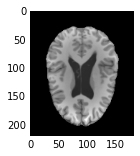

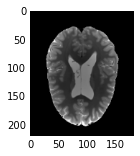

In [4]:
t1 = sitk.ReadImage(t1_fn)
t2 = sitk.ReadImage(t2_fn)

myshow(t1)
myshow(t2)

In [5]:
def ExtractBRAINFromHead(headImage, labelsMap):
    label_mask = labelsMap>0
    brainImage = sitk.Cast(headImage,sitk.sitkInt16) * sitk.Cast(label_mask,sitk.sitkInt16)
    return brainImage

In [6]:
labelMap = sitk.ReadImage(label_fn)
# labelMap = labelMap>0
# myshow(labelMap)
# labelMap = sitk.BinaryDilate(labelMap,1)
# myshow(labelMap)

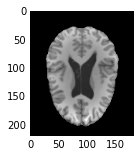

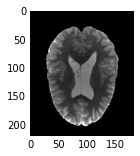

In [7]:
t1 = ExtractBRAINFromHead(t1,labelMap)
t2 = ExtractBRAINFromHead(t2,labelMap)
myshow(t1)
myshow(t2)

In [8]:
# Now we read dwi image and extract its b0
myExtracter = extractNrrdVectorIndex()
myExtracter.inputs.inputVolume = dwi_fn
myExtracter.inputs.vectorIndex = 0
myExtracter.inputs.outputVolume = os.path.join(OutputDir,'dwi_b0.nrrd')
print(myExtracter.cmdline)
myExtracter.run()

 extractNrrdVectorIndex  --inputVolume /scratch/TESTS/IpythonNotebook/20160615_HCPWF/mainWF/Outputs/DWI_corrected_alignedSpace.nrrd --outputVolume /scratch/TESTS/IpythonNotebook/20160615_HCPWF/2_SRWF/test_tune_parameters/outImageFiles/dwi_b0.nrrd --vectorIndex 0


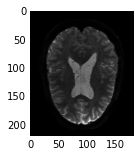

In [9]:
dwi_b0 = sitk.ReadImage(myExtracter.inputs.outputVolume)
myshow(dwi_b0)

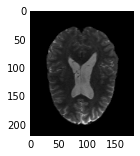

In [10]:
dwi_b0 = ExtractBRAINFromHead(dwi_b0,labelMap)
myshow(dwi_b0)

In [11]:
# Now t1 and t2 have original t1, t2 voxel lattice with following specifications:
print(t1.GetSize())
print(t1.GetDirection())
print(t1.GetOrigin())
print('---')
print(t2.GetSize())
print(t2.GetDirection())
print(t2.GetOrigin())
print('---')
print(dwi_b0.GetSize())
print(dwi_b0.GetDirection())
print(dwi_b0.GetOrigin())

(145, 174, 145)
(0.9999211475112292, -0.007193358575161204, 0.010293413050869012, -0.007764477999910271, -0.9983687572278048, 0.05656445414566909, -0.009869733593950502, 0.056639916876861235, 0.9983458860409886)
(-90.53082456980309, 124.92404085579238, -74.79526909881615)
---
(145, 174, 145)
(0.9999211475112292, -0.007193358575161204, 0.010293413050869012, -0.007764477999910271, -0.9983687572278048, 0.05656445414566909, -0.009869733593950502, 0.056639916876861235, 0.9983458860409886)
(-90.53082456980309, 124.92404085579238, -74.79526909881615)
---
(145, 174, 145)
(0.9999211475112292, -0.007193358575161204, 0.010293413050869012, -0.007764477999910271, -0.9983687572278048, 0.05656445414566909, -0.009869733593950502, 0.056639916876861235, 0.9983458860409886)
(-90.53082456980309, 124.92404085579238, -74.79526909881615)


In [12]:
# # Now set direction cosign of all images to identity
# def ForceDCtoID(inputVolume):
#     import os
#     import SimpleITK as sitk
#     inputVolume.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))
#     return inputVolume

# def ForceOriginToZero(inputVolume):
#     import os
#     import SimpleITK as sitk
#     inputVolume.SetOrigin((0.0, 0.0, 0.0))
#     return inputVolume

In [13]:
# dwi_b0 = ForceDCtoID(dwi_b0)
# dwi_b0 = ForceOriginToZero(dwi_b0)

# t1 = ForceDCtoID(t1)
# t1 = ForceOriginToZero(t1)

# t2 = ForceDCtoID(t2)
# t2 = ForceOriginToZero(t2)

In [14]:
# myshow(dwi_b0)
# myshow(t1)
# myshow(t2)

In [15]:
# print(t1.GetSize())
# print(t1.GetDirection())
# print(t1.GetOrigin())

# print(t2.GetSize())
# print(t2.GetDirection())
# print(t2.GetOrigin())

# print(dwi_b0.GetSize())
# print(dwi_b0.GetDirection())
# print(dwi_b0.GetOrigin())

In [16]:
def NormalizeBetweenZeroAndOne(image):
    image_double = sitk.Cast(image, sitk.sitkFloat32)
    # new range
    newMax=1.0
    newMin=0
    # Find old range
    totalStats = sitk.StatisticsImageFilter()
    totalStats.Execute(image_double)
    oldMax=totalStats.GetMaximum()
    oldMin=totalStats.GetMinimum()
    f=(newMax-newMin)/(oldMax-oldMin)
    Normalized_image = (image_double-oldMin)*f+newMin
    return Normalized_image

In [17]:
# Save the axial 2d dwi file (dwib0_2D) as a matlab file in "MatlabFiles" directory.

dwib0_2D = dwi_b0[:,:,dwi_b0.GetSize()[2]/2]

print(dwib0_2D.GetSize())
print(dwib0_2D.GetSpacing())

# Now normalize dwi_b0 to have values between 0 and 1
dwib0_2D = NormalizeBetweenZeroAndOne(dwib0_2D)
dwi_im_arr = sitk.GetArrayFromImage(dwib0_2D)

import scipy.io
scipy.io.savemat(os.path.join(MatlabFilesDir,'dwib0_testdata.mat'), mdict={'inputImage': dwi_im_arr})

(145, 174)
(1.2499999999999998, 1.2499999999999996)


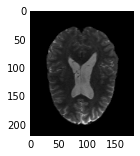

In [18]:
dwi_b0_norm = NormalizeBetweenZeroAndOne(dwi_b0)
myshow(dwi_b0_norm)
dwi_im_arr_3D = sitk.GetArrayFromImage(dwi_b0_norm)
scipy.io.savemat(os.path.join(MatlabFilesDir,'dwib0_testdata_3D.mat'), mdict={'inputImage': dwi_im_arr_3D})

In [19]:
###### JUST FOR EXPERIMENT ########################
#t1d = t1*4 + 500
#t2d = t2/4 - 100
t1d = t1
t2d = t2

In [20]:
# Write images to the disk for checking their alignment in slicer
voxel_t1 = os.path.join(OutputDir,'t1_inVoxelSpace.nrrd') #
voxel_t2 = os.path.join(OutputDir,'t2_inVoxelSpace.nrrd') #
dwi_b0_voxel = os.path.join(OutputDir,'dwi_b0_inVoxelSpace.nrrd')

sitk.WriteImage(t1d,voxel_t1)
sitk.WriteImage(t2d,voxel_t2)
sitk.WriteImage(dwi_b0,dwi_b0_voxel)

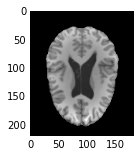

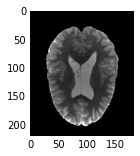

In [21]:
myshow(t1d)
myshow(t2d)

In [22]:
t1g = sitk.GradientMagnitude(t1d)
t2g = sitk.GradientMagnitude(t2d)

totalStats = sitk.StatisticsImageFilter()

totalStats.Execute(t1d)
print(totalStats.GetMaximum())
print(totalStats.GetMinimum())

totalStats.Execute(t1g)
print(totalStats.GetMaximum())
print(totalStats.GetMinimum())

totalStats.Execute(t2d)
print(totalStats.GetMaximum())
print(totalStats.GetMinimum())

totalStats.Execute(t2g)
print(totalStats.GetMaximum())
print(totalStats.GetMinimum())


3510.0
0.0
1689.31066895
0.0
4095.0
0.0
2753.35522461
0.0


In [23]:
################################################################
# Now we find the gradient magnitude edge map from T1 and T2
# Such that we rescale the intensities of both image and pick the maximum value at each pixel
################################################################

# MGI = GenerateSummedGradientImage() # Maximum Gradient Image
# MGI.inputs.inputVolume1 = os.path.join(OutputDir,'t1_inVoxelSpace.nii.gz')
# MGI.inputs.inputVolume2 = os.path.join(OutputDir,'t2_inVoxelSpace.nii.gz')
# MGI.inputs.MaximumGradient = True
# MGI.inputs.outputFileName = os.path.join(OutputDir,'MaximumGradientImage.nii.gz')
# print(MGI.cmdline)
# MGI.run()

In [24]:
# NewMethod = True

# mgi_fn = os.path.join(OutputDir,'MaximumGradientImage.nrrd') # Maximum gradient image
# edgemap_fn = os.path.join(OutputDir,'edgeMap.nrrd') # Maximum gradient image
# BRIANSToolsPath = '/scratch/BS/release-BSR2/bin'

# if(NewMethod):
#     !{BRIANSToolsPath}/GenerateEdgeMapImage \
#     --inputMRVolumes {voxel_t1},{voxel_t2} \
#     --outputEdgeMap {edgemap_fn} \
#     --outputMaximumGradientImage {mgi_fn} \
#     --minimumOutputRange 1 \
#     --maximumOutputRange 255 \
#     --lowerPercentileMatching 0.5 \
#     --upperPercentileMatching 0.95 #\
#     #--inputMask {label_fn}
# else:
#     MGI = GenerateSummedGradientImage() # Maximum Gradient Image
#     MGI.inputs.inputVolume1 = voxel_t1
#     MGI.inputs.inputVolume2 = voxel_t2
#     MGI.inputs.MaximumGradient = True
#     MGI.inputs.outputFileName = mgi_fn
#     print(MGI.cmdline)
#     MGI.run()

In [1]:
NewMethod = True

mgi_fn = os.path.join(OutputDir,'MaximumGradientImage.nrrd') # Maximum gradient image
edgemap_fn = os.path.join(OutputDir,'edgeMap.nrrd') # Maximum gradient image
BRIANSToolsPath = '/scratch/BS/release-BSR2/bin'

if(NewMethod):
    GEM = GenerateEdgeMapImage()
    GEM.inputs.inputMRVolumes = [voxel_t1,voxel_t2]
    GEM.inputs.outputEdgeMap = edgemap_fn
    GEM.inputs.outputMaximumGradientImage = mgi_fn
    GEM.inputs.minimumOutputRange = 1
    GEM.inputs.maximumOutputRange = 255
    GEM.inputs.lowerPercentileMatching = 0.5
    GEM.inputs.upperPercentileMatching = 0.95
    #GEM.inputs.inputMask = label_fn
    print(GEM.cmdline)
    GEM.run()
else:
    MGI = GenerateSummedGradientImage() # Maximum Gradient Image
    MGI.inputs.inputVolume1 = voxel_t1
    MGI.inputs.inputVolume2 = voxel_t2
    MGI.inputs.MaximumGradient = True
    MGI.inputs.outputFileName = mgi_fn
    print(MGI.cmdline)
    MGI.run()

NameError: name 'os' is not defined

255.0
1.0


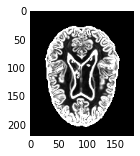

In [26]:
mgi = sitk.ReadImage(mgi_fn)
myshow(mgi)

totalStats = sitk.StatisticsImageFilter()
totalStats.Execute(mgi)
print(totalStats.GetMaximum())
print(totalStats.GetMinimum())

In [27]:
if(NewMethod):
    edgeMask = sitk.ReadImage(edgemap_fn)
else:
    mgi = sitk.Cast(mgi, sitk.sitkFloat32)
    # "edgeMask" is computed as 1/mgi or 1/(mgi)^2
    #----------------------------------------------
    # compute 1/mgi
    div = sitk.DivideImageFilter()
    edgeMask1 = div.Execute(1.0,mgi)
    myshow(edgeMask1)

    # compute 1/(mgi)^2
    mgi2 = sitk.Square(mgi)
    div = sitk.DivideImageFilter()
    edgeMask2 = div.Execute(1.0,mgi2)
    myshow(edgeMask2)
    #----------------------------------------------

    edgeMask = edgeMask1
    #edgeMask = edgeMask2

1.0
0.00392156885937
0.789039879096


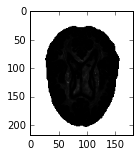

In [28]:
myshow(edgeMask)

totalStats = sitk.StatisticsImageFilter()
totalStats.Execute(edgeMask)
print(totalStats.GetMaximum())
print(totalStats.GetMinimum())
print(totalStats.GetMean())

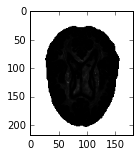

In [29]:
#sitk.WriteImage(edgeMask,os.path.join(OutputDir,'weight_image.nii.gz'))

edgeMask_2D = edgeMask[:,:,edgeMask.GetSize()[2]/2]
myshow(edgeMask_2D)

edge_arr = sitk.GetArrayFromImage(edgeMask_2D)

import scipy.io
scipy.io.savemat(os.path.join(MatlabFilesDir,'edgemask_t1t2_1ByGMI.mat'), mdict={'edgemask': edge_arr})

In [30]:
print(edge_arr.dtype)
print(edge_arr.shape)
print(np.amax(edge_arr))
print(np.amin(edge_arr))
print(np.mean(edge_arr))

float32
(174, 145)
1.0
0.00392157
0.555519


In [31]:
edge_arr_3D = sitk.GetArrayFromImage(edgeMask)
scipy.io.savemat(os.path.join(MatlabFilesDir,'edgemask_t1t2_1ByGMI_3D.mat'), mdict={'edgemask': edge_arr_3D})